In [61]:
%matplotlib inline
import os
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import numpy as np
from src.telstra_data import TelstraData

In [62]:
## load into the data
datadir = 'data'
def str_to_num(string):
    return int(string.split(" ")[1])
train = pd.read_csv(os.path.join(datadir, 'train.csv'), index_col='id', converters = {'location':str_to_num})
test = pd.read_csv(os.path.join(datadir, 'test.csv'), index_col='id', converters = {'location':str_to_num})

events = pd.read_csv(os.path.join(datadir,'event_type.csv'), converters = {'event_type':str_to_num})
log = pd.read_csv(os.path.join(datadir,'log_feature.csv'), converters = {'log_feature':str_to_num})
resource = pd.read_csv(os.path.join(datadir,'resource_type.csv'), converters = {'resource_type':str_to_num})
sev = pd.read_csv(os.path.join(datadir,'severity_type.csv'), index_col = 'id',converters = {'severity_type':str_to_num})

In [63]:
df = train.append(test)

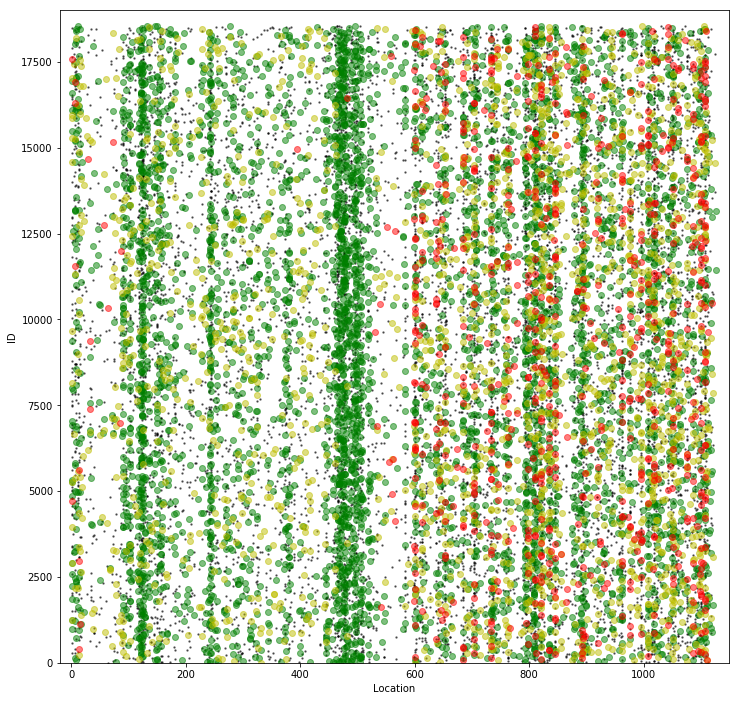

In [64]:
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(df.loc[df.fault_severity.isnull(),'location'],df.loc[df.fault_severity.isnull()].index,alpha=0.5,color='k',s=2)
ax.scatter(df.loc[df.fault_severity==0,'location'],df.loc[df.fault_severity==0].index,alpha=0.5,color='g')
ax.scatter(df.loc[df.fault_severity==1,'location'],df.loc[df.fault_severity==1].index,alpha=0.5,color='y')
ax.scatter(df.loc[df.fault_severity==2,'location'],df.loc[df.fault_severity==2].index,alpha=0.5,color='r')
ax.set_xlim((-20,1150))
ax.set_ylim((0,19000))
ax.set_xlabel('Location')
ax.set_ylabel('ID');
ax.legend()

In [65]:
# merge all the features together
X = pd.merge(train,sev, how='left',left_index=True,right_index = True).fillna(0)

# merge event count
nevents = pd.DataFrame(events['id'].value_counts()).rename(columns = {'id':'nevents'})
X = pd.merge(X, nevents, right_index = True,left_index=True, how='left').fillna(0)

#merge resource 
nresource = pd.DataFrame(resource['id'].value_counts()).rename(columns = {'id':'nresouce'})
X = pd.merge(X, nresource, right_index = True,left_index=True, how='left').fillna(0)

# merge log features
logvol = log.groupby('id')['volume'].agg(['count','min', 'mean', 'max', 'std', 'sum']).fillna(0).add_prefix(
            'logvolume_')

X = pd.merge(X, logvol, how='left', right_index=True, left_index=True).fillna(0)

y = X['fault_severity']

X = X.drop(['fault_severity'],axis =1)
X.reset_index(inplace = True)

#scale
index = X['id']
scaler = StandardScaler()
scaler.fit(X)
X_sca = pd.DataFrame(scaler.transform(X),columns=X.columns)
X_sca['id'] = index
X_sca.set_index('id',inplace = True)
# X_sca.head(10)
# print(X.shape)


In [66]:
X_train,X_test,y_train,y_test = train_test_split(X_sca,y,test_size = 0.2,random_state=42)

In [67]:
X_train

,location,severity_type,nevents,nresouce,logvolume_count,logvolume_min,logvolume_mean,logvolume_max,logvolume_std,logvolume_sum
id,,,,,,,,,,
11885,0.407630,0.449762,-0.949964,-0.330820,-0.548183,-0.250473,-0.343754,-0.347446,-0.276987,-0.365172
13053,-0.512519,0.449762,0.428389,-0.330820,-0.103014,-0.250473,-0.289173,-0.266330,-0.189244,-0.301819
6710,1.043936,0.449762,-0.949964,-0.330820,-0.993353,-0.250473,-0.367146,-0.374484,-0.322125,-0.390514
14794,-1.576148,0.449762,0.428389,-0.330820,-0.548183,0.763389,0.334604,0.031094,-0.322125,0.002278
2783,-0.481328,0.449762,0.428389,-0.330820,0.342155,-0.250473,-0.156621,-0.077060,-0.024993,-0.124429
3889,-0.783885,0.449762,0.428389,-0.330820,-0.548183,2.115206,1.504186,0.842250,0.129250,0.635813
5527,0.367081,0.449762,0.428389,1.932186,-0.993353,-0.182883,-0.320362,-0.347446,-0.322125,-0.377843
9867,0.707068,-0.864447,0.428389,1.932186,-0.103014,-0.250473,-0.335957,-0.347446,-0.285270,-0.339831
12522,1.334017,0.449762,-0.949964,-0.330820,-0.548183,0.019890,0.030512,-0.022983,0.084113,-0.162441


0.7696815177629784
SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
CPU times: user 1min 31s, sys: 193 ms, total: 1min 31s
Wall time: 1min 31s


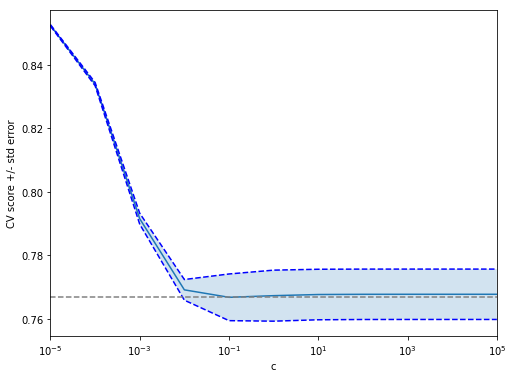

In [124]:
%%time

# logistic regression
from time import time
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

def plotError(scores,scores_std,estimator,n_folds = 5):
    plt.figure().set_size_inches(8, 6)
    plt.semilogx(estimator, scores)
    # plot error lines showing +/- std. errors of the scores
    n_folds = 5
    std_error = scores_std / np.sqrt(n_folds)

    plt.semilogx(estimator, scores + std_error, 'b--')
    plt.semilogx(estimator, scores - std_error, 'b--')

    # alpha=0.2 controls the translucency of the fill color
    plt.fill_between(estimator, scores + std_error, scores - std_error, alpha=0.2)

    plt.ylabel('CV score +/- std error')
    plt.xlabel('c')
    plt.axhline(np.min(scores), linestyle='--', color='.5')
    plt.xlim([c[0], c[-1]])
    print(min(score))
    print(c[score_avg.index(min(score_avg))])
#     print(clf.best_score_)
#     print(clf.best_estimator_)

from sklearn.model_selection import cross_val_score
X_train,X_test,y_train,y_test = train_test_split(X_sca,y,test_size = 0.2,random_state=42)  

# c = np.logspace(-5,5,num = 11)  #best 0.1
c = np.linspace(0.05,0.5)
logloss = make_scorer(computeLoss2,greater_is_better=True,needs_proba = True)
# print(logloss)
# parameters = {'C': list(c)}
# lr = LogisticRegression(random_state = 42,multi_class = 'multinomial',solver = 'saga',max_iter = 5000)
# clf = GridSearchCV(lr,parameters,cv=5,scoring=logloss)

# clf.fit(X_train,y_train)

# y_pred = clf.predict_proba(X_test)
    
# loss(clf,y_test,y_pred)
score_avg = []
score_std = []
c = np.logspace(-5,5,num = 11)

for l in c:

    lr = LogisticRegression(random_state = 42,C = l,multi_class = 'multinomial',solver = 'saga',max_iter = 5000)
    score = cross_val_score(lr,X_train,y_train,cv=5,scoring = logloss)

    score_avg.append(np.mean(score))
    score_std.append(np.std(score))

plotError(score_avg,score_std,c,n_folds = 5)
# the best is 0.5
## make score
# clf.predict_proba()

0.1


In [89]:

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
def computeLoss2(groud_truth,predictions):
#     print(predictions)
    predictions = pd.DataFrame(predictions)
    
    eps = 1e-15
    y_true = groud_truth
    predictions = np.clip(predictions,eps,1-eps)
    predictions.div(predictions.sum(axis=1), axis=0)
    

    actual = np.zeros(predictions.shape)
    
    n_samples = actual.shape[0]
    
    actual[np.arange(n_samples),y_true.astype(int)] = 1
#     print(actual)
    
    vectsum = np.sum(actual * np.log(predictions))
    
    loss = np.sum(-1.0/n_samples*vectsum)
    return loss
    
    
    
X_train,X_test,y_train,y_test = train_test_split(X_sca,y,test_size = 0.2,random_state=42)    
lr_best = LogisticRegression(C = 0.5,multi_class = 'multinomial',solver = 'saga',random_state = 42,max_iter = 5000)
lr_best.fit(X_train,y_train)
computeLoss2(y_test,lr_best.predict_proba(X_test))

0.7712511259363343

In [85]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
def computeLoss(model,x,y):

#     y_pred = pd.DataFrame(model.predict(x),index = x.index.values)
    y_pred_prob = pd.DataFrame(model.predict_proba(x),index = x.index.values)
    eps = 1e-15
    y_true = y
    
    predictions = np.clip(y_pred_prob,eps,1-eps)
    
    predictions.div(predictions.sum(axis=1), axis=0)
    

    actual = np.zeros(y_pred_prob.shape)
    
    n_samples = actual.shape[0]
    
    actual[np.arange(n_samples),y_true.astype(int)] = 1
    
    vectsum = np.sum(actual * np.log(predictions))
    
    loss = np.sum(-1.0/n_samples*vectsum)
    return loss
    
    
    
X_train,X_test,y_train,y_test = train_test_split(X_sca,y,test_size = 0.2,random_state=42)    
lr_best = LogisticRegression(C = 0.5,multi_class = 'multinomial',solver = 'saga',random_state = 42,max_iter = 5000)
lr_best.fit(X_train,y_train)
computeLoss(lr_best,X_test,y_test)


0.7712511259363343

In [133]:
def plotError2(scores,scores_std,estimator,n_folds = 5):
    plt.figure().set_size_inches(8, 6)
    plt.semilogx(estimator, scores)
    # plot error lines showing +/- std. errors of the scores
    n_folds = 5
    std_error = scores_std / np.sqrt(n_folds)

    plt.semilogx(estimator, scores + std_error, 'b--')
    plt.semilogx(estimator, scores - std_error, 'b--')

    # alpha=0.2 controls the translucency of the fill color
    plt.fill_between(estimator, scores + std_error, scores - std_error, alpha=0.2)

    plt.ylabel('CV score +/- std error')
    plt.xlabel('c')
    plt.axhline(np.min(scores), linestyle='--', color='.5')
    plt.xlim([c[0], c[-1]])
    print(min(score))
    print(c[score_avg.index(min(score_avg))])

1.018117950836068

In [ ]:
# svm 

import numpy as np
import pandas as pd

from IPython.display import Image
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn import svm
from sklearn.svm import SVC

from matplotlib import pyplot as plt
%matplotlib inline
X_train,X_test,y_train,y_test = train_test_split(X_sca,y,test_size = 0.2,random_state=42)  


c = np.linspace(80,120)
# c=range(1,10)
# parameters = {'kernel': ('linear','rbf'),'C':[1,10]}
parameters = {'C': list(c)}
svc = svm.SVC(probability = True,'kernel' = 'rbf')
clf = GridSearchCV(svc,parameters,cv=5)
clf.fit(X_train,y_train)

scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

print(clf.best_score_)
print(clf.best_estimator_)

In [19]:
c = np.logspace(-5,5,num = 11)
# c = np.linspace(0.1,5)
# c=range(1,10)
# parameters = {'kernel': ('linear','rbf'),'C':[1,10]}
parameters = {'C': list(c)}
svc = svm.SVC(probability = True,kernel = 'rbf')
clf = GridSearchCV(svc,parameters,cv=5)
clf.fit(X_train,y_train)

scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

print(clf.best_score_)
print(clf.best_estimator_)

0.6803861788617886
SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [ ]:
# get the score from the best model

clf_best = SVC(probability = True,kernel = 'rbf',C = 10)
clf_best.fit(X_train,y_train)
computeLoss(clf_best,X_test,y_test)

In [136]:
clf.cv_results_

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

{'mean_fit_time': array([ 2.12399817,  2.34987378,  2.54012833,  1.31478057,  2.81676712,
         4.21830306,  4.93382688,  2.38249931,  2.58094983,  2.79276538,
         1.27049017,  3.37792802,  5.33474321,  5.65957036,  2.63797297,
         3.03685317,  2.96710877,  1.31237316,  3.58110714,  5.90829797,
         6.64036298,  3.44997339,  3.73342319,  3.51902933,  1.30724921,
         4.82383847,  7.85329666,  8.02419877,  5.48623037,  4.8326889 ,
         6.12010112,  1.25505962, 10.21148505, 15.33994088,  9.6763226 ]),
 'mean_score_time': array([0.07119246, 0.07191229, 0.07597375, 0.04540157, 0.08126101,
        0.09029512, 0.12878222, 0.07452154, 0.07371111, 0.07523861,
        0.0440536 , 0.08501201, 0.09668951, 0.12469964, 0.07704225,
        0.07456269, 0.0745822 , 0.0447978 , 0.07576027, 0.09021916,
        0.12684374, 0.07819085, 0.0764657 , 0.07661109, 0.04389501,
        0.08121963, 0.09084406, 0.12529745, 0.07536001, 0.07479744,
        0.07144318, 0.04302163, 0.07626405,

In [11]:
from sklearn.svm import SVC
clf = SVC(probability=True)
clf.fit(X_train,y_train)
computeLoss(clf,X_test,y_test)

0.7353757134269379

In [146]:
%%time
## Random Forest
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test = train_test_split(X_sca,y,test_size = 0.2,random_state=42)  
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
loss2tr = computeLoss(clf,X_train,y_train )
loss2te = computeLoss(clf,X_test,y_test)
print("Random Forest: train loss {:.4f}, test loss {:.4f}".format(loss2tr, loss2te))

Random Forest: train loss 0.1735, test loss 2.7796
CPU times: user 75.8 ms, sys: 5.5 ms, total: 81.3 ms
Wall time: 80 ms


In [149]:
%%time
from src.refined_rf import RefinedRandomForest
from src.telstra_data import TelstraData, multiclass_log_loss

rrf = RefinedRandomForest(clf, C = 0.01, n_prunings = 0)
rrf.fit(X_train, y_train)
loss3tr = multiclass_log_loss(y_train.values, rrf.predict_proba(X_train))
loss3te = multiclass_log_loss(y_test.values, rrf.predict_proba(X_test))

print("Refined Random Forest, not pruned: train loss {:.4f}, test loss {:.4f}".format(loss3tr, loss3te))

Refined Random Forest, not pruned: train loss 0.7249, test loss 0.7949
CPU times: user 259 ms, sys: 57.7 ms, total: 316 ms
Wall time: 414 ms


In [150]:
%%time
rrf.n_prunings = 1 # do one pruning in each iteration
trainloss = [loss3tr]
testloss = [loss3te]
nleaves = [sum(rrf.n_leaves_)] # remember number of leaves in each iteration
for k in range(100):
    rrf.fit(X_train, y_train) # fit and do 1 pruning
    loss4tr = multiclass_log_loss(y_train.values, rrf.predict_proba(X_train))
    loss4te = multiclass_log_loss(y_test.values, rrf.predict_proba(X_test))
    trainloss.append(loss4tr)
    testloss.append(loss4te)
    nleaves.append(sum(rrf.n_leaves_))
#     print(nleaves)
    print("Pruning {:02d}: train loss {:.4f}, test loss {:.4f}".format(k+1, loss4tr, loss4te))
    if loss4te > 0.9:
        break # stop when test error increases too much

Pruning 01: train loss 0.7256, test loss 0.7944
Pruning 02: train loss 0.7260, test loss 0.7934
Pruning 03: train loss 0.7259, test loss 0.7919
Pruning 04: train loss 0.7255, test loss 0.7901
Pruning 05: train loss 0.7246, test loss 0.7881
Pruning 06: train loss 0.7230, test loss 0.7855
Pruning 07: train loss 0.7209, test loss 0.7824
Pruning 08: train loss 0.7183, test loss 0.7786
Pruning 09: train loss 0.7151, test loss 0.7742
Pruning 10: train loss 0.7119, test loss 0.7696
Pruning 11: train loss 0.7081, test loss 0.7643
Pruning 12: train loss 0.7046, test loss 0.7593
Pruning 13: train loss 0.7000, test loss 0.7536
Pruning 14: train loss 0.6942, test loss 0.7474
Pruning 15: train loss 0.6896, test loss 0.7425
Pruning 16: train loss 0.6849, test loss 0.7358
Pruning 17: train loss 0.6806, test loss 0.7316
Pruning 18: train loss 0.6758, test loss 0.7247
Pruning 19: train loss 0.6718, test loss 0.7189
Pruning 20: train loss 0.6680, test loss 0.7136
Pruning 21: train loss 0.6652, test loss

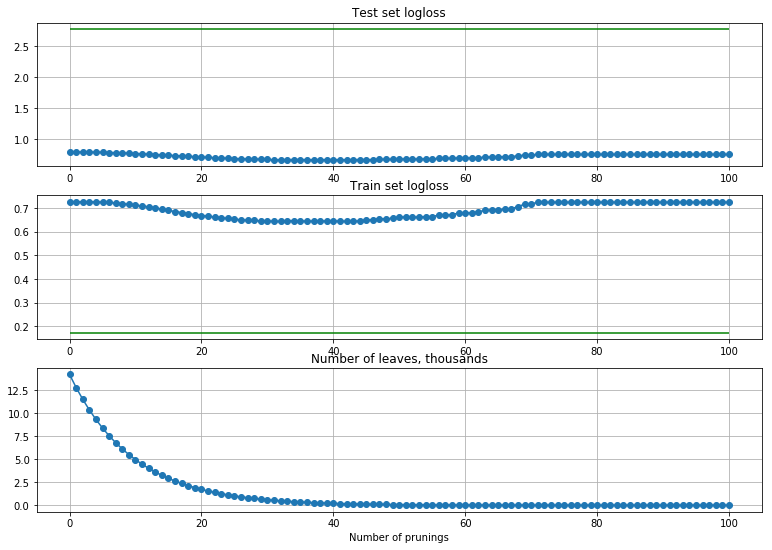

In [51]:
nprunings = np.arange(len(trainloss))
fig, ax = plt.subplots(3, figsize=(13,9))
ax[0].plot(nprunings, testloss, '-o')
ax[0].set_title('Test set logloss')
ax[0].grid()
ax[0].hlines(loss2te, nprunings.min(), nprunings.max(), colors='g', linestyles='solid')
ax[1].plot(nprunings, trainloss, '-o')
ax[1].set_title('Train set logloss')
ax[1].grid()
ax[1].hlines(loss2tr, nprunings.min(), nprunings.max(), colors='g', linestyles='solid')
ax[2].plot(nprunings, np.array(nleaves)/1000, '-o')
ax[2].set_title('Number of leaves, thousands')
ax[2].set_xlabel('Number of prunings')
ax[2].grid()